In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
## Load the test set for model evaluation
test_loc = 'Fold1/Fold1/Test'
test = ImageDataGenerator(rescale = 1/255)
test_dataset = test.flow_from_directory(directory=test_loc,
                                     classes = ['Others', 'Monkeypox'],
                                     target_size=(224,224),
                                     class_mode = "binary",
                                     batch_size=32,
                                     shuffle=False,
                                     seed = 42)

Found 45 images belonging to 2 classes.


In [3]:
# Load the model to evaluate
model = tf.keras.models.load_model('saved_model/cnn_model.h5')

2022-12-14 16:51:31.043563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Test Accuracy and Test Loss

In [4]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

2/2 - 0s - loss: 0.6409 - accuracy: 0.7333 - 477ms/epoch - 239ms/step

Test accuracy: 0.7333333492279053

Test loss: 0.6408994197845459


## Confusion Matrix

In [5]:
pred_prob = model.predict(test_dataset) #get the probability predicted by the model

2/2 [==============================] - 0s 79ms/step


In [6]:
pred_prob = pred_prob.flatten() #flatten the results

In [7]:
pred_prob 

array([0.23957965, 0.28246608, 0.26584864, 0.30003056, 0.3898487 ,
       0.2653199 , 0.3748808 , 0.4102957 , 0.99744207, 0.33107632,
       0.0821729 , 0.5310318 , 0.7793258 , 0.90855604, 0.1409531 ,
       0.58858466, 0.7027749 , 0.7973996 , 0.77470535, 0.26375106,
       0.68270993, 0.1595205 , 0.539941  , 0.29163834, 0.30695593,
       0.53001434, 0.7192281 , 0.76382273, 0.24083665, 0.7934619 ,
       0.84260815, 0.9682116 , 0.5731735 , 0.92704386, 0.68594205,
       0.8166479 , 0.8166478 , 0.96163976, 0.9540036 , 0.98081857,
       0.8623096 , 0.4129715 , 0.64583015, 0.9662204 , 0.9236243 ],
      dtype=float32)

In [8]:
pred_class = pred_prob.copy()

In [9]:
#we use 0.5 as the threshold for our predictions 1 meaning monkeypox and 0 meaning others
pred_class[pred_class>=0.4] = 1 
pred_class[pred_class<0.4] = 0

In [10]:
pred_prob

array([0.23957965, 0.28246608, 0.26584864, 0.30003056, 0.3898487 ,
       0.2653199 , 0.3748808 , 0.4102957 , 0.99744207, 0.33107632,
       0.0821729 , 0.5310318 , 0.7793258 , 0.90855604, 0.1409531 ,
       0.58858466, 0.7027749 , 0.7973996 , 0.77470535, 0.26375106,
       0.68270993, 0.1595205 , 0.539941  , 0.29163834, 0.30695593,
       0.53001434, 0.7192281 , 0.76382273, 0.24083665, 0.7934619 ,
       0.84260815, 0.9682116 , 0.5731735 , 0.92704386, 0.68594205,
       0.8166479 , 0.8166478 , 0.96163976, 0.9540036 , 0.98081857,
       0.8623096 , 0.4129715 , 0.64583015, 0.9662204 , 0.9236243 ],
      dtype=float32)

In [11]:
pred_class

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [12]:
label = test_dataset.classes

In [13]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [14]:
cm = tf.math.confusion_matrix(label, pred_class)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 11],
       [ 1, 19]], dtype=int32)>

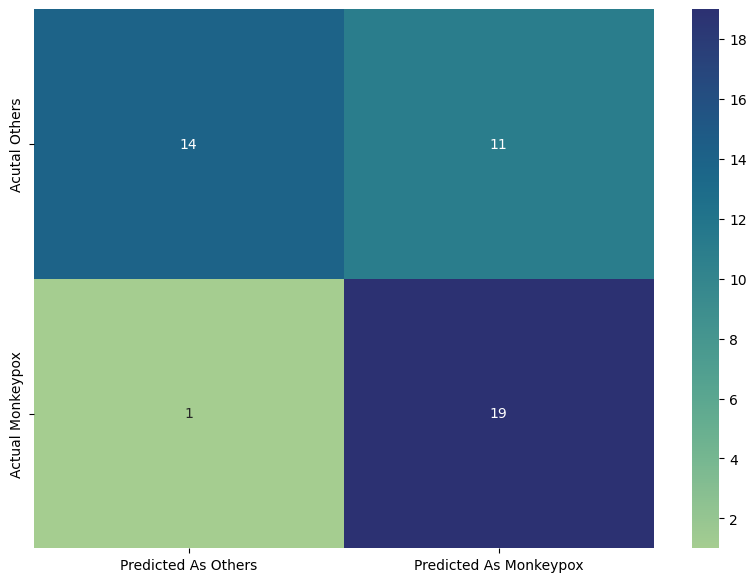

In [15]:
df_cm = pd.DataFrame(cm, index = ['Acutal Others','Actual Monkeypox'],
                  columns = ['Predicted As Others','Predicted As Monkeypox'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='crest')
plt.savefig('confusionMatrix.jpg')

## ROC Curve

In [16]:
from sklearn.metrics import roc_curve

In [17]:

fpr, tpr, thresholds = roc_curve(label, pred_prob) # get false positive rate, true positive rate for each threshold

In [18]:
len(thresholds)

20

In [19]:
import matplotlib.pyplot as plt

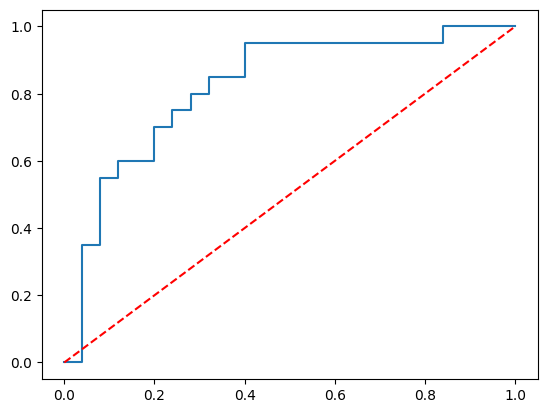

In [20]:
fig = plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
fig.savefig('ROC curve.jpg')